In [1]:
from setup import general
from setup import stat
from setup import r

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from pingouin import ancova # anconva
from pingouin import multivariate_normality # for pearson correlation
from rpy2 import robjects

In [2]:
general.pd_setup()
db, dbcr = general.db_conn('../database/SCI_pt.db')
%store -r Pt_included

/home/jzni/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<a id="injury_summary"></a>
# 患者损伤部位、症状与诊断等
MRI评估大部分患者病变节段较多，以此作为分类变量效果差，故只做描述

In [3]:
%store -r Pt_medical_info
Pt_medical_info

,MRI_Assessment,ASIA_Pretest,Sensory_Abonormality_Pretest,Diagnosis,Cause_of_Lesion,Surgery_Type
PatientID,,,,,,
P_003,"C3/4,C4/5,C5/6,C6/7,C7T1椎间盘向后膨出，颈椎退行性病变",D,双侧上臂、前臂、手部感觉麻木、针刺样疼痛，食指、中指、示指背侧疼痛感最重，拒触,颈椎过伸伤,摩托车撞伤,保守治疗
P_004,"C3/4,C4/5,C5/6,C6/7间盘突出",C,双上肢上臂痛觉过敏，前臂及双手浅感觉减退，锁骨以下水平浅感觉减退，深感觉无殊,1.颈椎过伸伤伴颈脊髓损伤 2. 颈椎后韧带骨化,骑电瓶车摔倒，面部着地,颈椎前路椎间盘切除减压+植骨+内固定；脊神经根减压术；椎管扩大成形术
P_013,"C3/4,C4/5,C5/6,C6/7间盘突出变性，伴椎管狭窄",D,双上肢背侧、双下肢外侧浅感觉减退，双手背侧及掌侧痛觉过敏，左下肢足背浅感觉减退,1.颈椎过伸伤伴颈脊髓不完全损伤 2. 腰椎间盘突出症 3. 额骨骨折（左侧）4.肥大泡（双侧）,车祸、头部撞击安全气囊,颈前路减压植骨融合内固定术
P_014,"C3/4,C4/5,C5/6椎间盘突出,变性、伴椎管稍狭窄、颈椎推行性变",D,双手浅感觉减退，痛觉过敏,1.颈椎过伸伤伴颈髓损伤 2.右眼眶骨折 3.膀胱恶性肿瘤个人史,骑车摔伤,保守治疗
P_018,"C3/4,C4/5,C5/6,C6/7椎间盘突出，伴脊髓伴脊髓变性",D,四肢麻木刺痛感，较低踩棉花,1.颈椎过伸伤伴颈脊髓不完全损伤 2. 颈椎间盘突出 3. 面部软组织挫伤4.腰椎间盘突出症,下山踩空摔下山坡,颈前路减压植骨融合内固定术
P_021,C5/6椎间盘突出，颈椎退行性病变,C,双手掌手背膝以下麻木,1.颈椎过伸伤伴颈脊髓损伤 2.头面部搓裂伤 3.颈椎退行性变 4. 2型糖尿病 5.高血压...,摔倒、额头着地,颈前路减压植骨融合内固定术
P_007,"C4/5,C5/6,C6/7椎间盘突出",B,双侧前臂及双手痛觉过敏，躯干脐平面以下、会阴区浅感觉、深感觉减退，双下肢浅感觉、深感觉消失,1.颈椎过伸伤伴颈脊髓损伤 2. 颈椎后韧带骨化 3. 高血压病 4. 糖耐量异常,骑车撞伤，头面部着地,脊神经根粘连松解术+神经根管扩张术
P_009,C2/3后韧带骨化,D,双上肢外侧浅感觉减退，双手指尖痛觉过敏,1.颈椎过伸伤 2. 颈椎椎管狭窄 3. 颈椎后纵韧带骨化 4. 原发性甲状腺功能减退症,起床时在床上滚落，额部着地,颈椎后路椎板切除减压+植骨融合+内固定，椎间盘切除植骨术
P_011,C4/5椎间盘突出,D,双上肢上臂、前臂，双手痛觉过敏,1.颈椎过伸伤伴不完全颈脊髓损伤 2.高血压病 3. 2型糖尿病 4. 胆囊切除术后状态,骑电瓶车被绊倒，向前摔伤，颜面部着地,颈椎前路椎间盘切除减压+植骨融合+内固定；脊神经根减压术；椎管扩大成形术


<AxesSubplot:title={'center':"Patient's ASIA Classification"}, ylabel='ASIA_Pretest'>

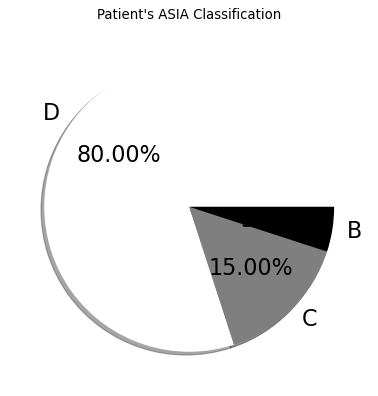

In [4]:
plt.figure(figsize=(6,6),dpi= 80)
plt.axis('off')
Pt_medical_info['ASIA_Pretest'].value_counts(normalize=True).plot(kind='pie', shadow=True, autopct='%.2f%%',
                                                                  title="Patient's ASIA Classification", colormap='gray_r',fontsize=20)

损伤节段统计：


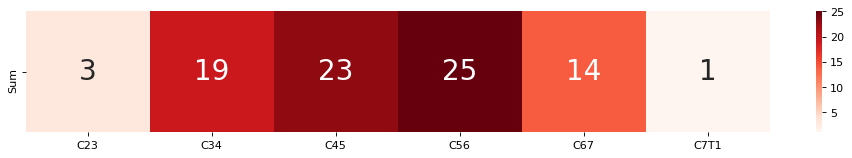

In [5]:
def inj(pos):
    return Injury_sum.sum()[pos]

print("损伤节段统计：")
sql = 'SELECT * FROM Injury_Summary'
dbcr.execute(sql)
Injury_sum = pd.DataFrame(dbcr.fetchall(),columns=general.get_columns('Injury_Summary',dbcr)).set_index(['ID'])
Injury_sum_heatmap_df = pd.DataFrame([[inj("C23"),inj("C34"),inj("C45"),inj("C56"),inj("C67"),inj("C7T1")]],columns=Injury_sum.columns[5:-2],index=['Sum'])

for col in Injury_sum_heatmap_df.columns:
    Injury_sum_heatmap_df[[col]] = Injury_sum_heatmap_df[col].map(lambda x:'{:.0f}'.format(x)).astype(int) 

plt.figure(figsize=(15,2), dpi= 80)
sns.heatmap(Injury_sum_heatmap_df, cmap='Reds', annot=True, annot_kws={"fontsize":25})
plt.show()

<AxesSubplot:title={'center':"Patient's ASIA Classification"}, ylabel='Treatment'>

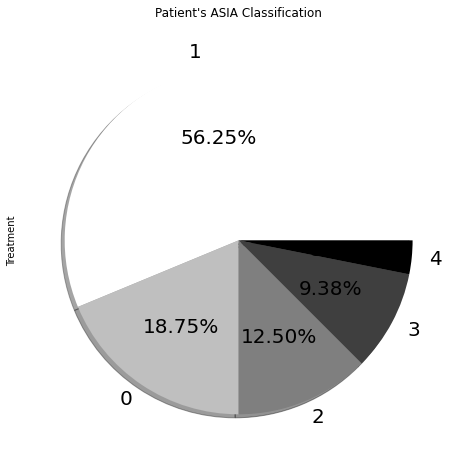

In [6]:
plt.figure(figsize=(8,8))
Injury_sum['Treatment'].value_counts(normalize=True).plot(kind='pie',shadow=True, autopct='%.2f%%', title="Patient's ASIA Classification", colormap='gray_r',fontsize=20)

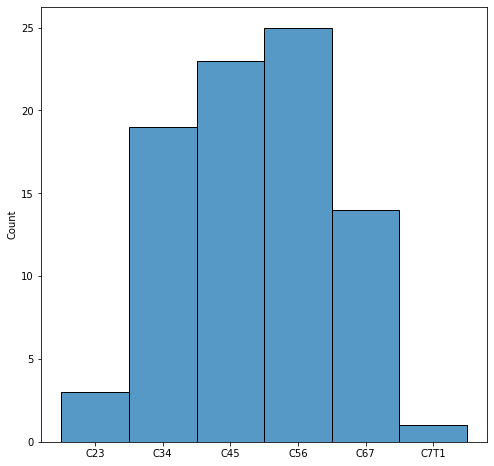

In [13]:
hist_data = []
for seg in ["C23","C34","C45","C56","C67","C7T1"]:
    hist_data += [seg for i in range(int(inj(seg)))]
plt.figure(figsize=(8,8))
sns.histplot(hist_data)
plt.show()

# 多项临床评价量表
**AIS** ASIA Impairment Scale 美国脊髓损伤学会脊髓损伤量表，包括**感觉评分、运动评分**   
**SCIM-III** spinal cord injury measurement 脊髓损伤独立性评估量表   
1. 自理能力
2. 呼吸和括约肌功能
3. 活动能力
4. 总分  
**WISCI——II** Walking Index for Spinal Cord Injury 脊髓损伤行走指数评分


In [8]:
%store -r asia nreps Scale_pt Scale_pt_2 Pt_included 

## 均值比较
**此处的数据比纳入的要多，仅供参考**

In [43]:
# 配对的数据
asia_paired=asia[asia['timepoint'].isin([1,2])].drop(['P_023', 'P_027'], axis=0)

In [41]:
# 前后测数据
asia1 = asia_paired[asia_paired['timepoint']==1]
asia2 = asia_paired[asia_paired['timepoint']==2]
# 转换数据类型
asia1[asia1.columns[-7:]] = asia1[asia1.columns[-7:]].astype('float')
asia2[asia2.columns[-7:]] = asia2[asia2.columns[-7:]].astype('float')
# 评价的指标
clinicals = asia.columns[-7:]

In [28]:
index=asia1['scimIII_1'].isna()
asia2['scimIII_1'][~index]

ID
P_004       1.0000
P_007       0.0000
P_009       4.0000
P_011      16.0000
P_013      16.0000
P_014      19.0000
P_015      20.0000
P_016      20.0000
P_018       6.0000
P_019      18.0000
P_020      10.0000
P_021       0.0000
P_022       5.0000
P_023          NaN
P_024       0.0000
P_027          NaN
P_028       0.0000
P_029       6.0000
P_030      16.0000
P_202001   12.0000
P_202002   20.0000
P_202002    4.0000
P_202002   20.0000
P_202002    7.0000
P_202006   12.0000
Name: scimIII_1, dtype: float64

In [48]:
asia_paired = []

for scale in clinicals:
    perm_paired_t = robjects.r['perm_matched_t'](r.to_csv_r(asia1_paired, 'pre', scale), r.to_csv_r(asia2_paired, 'post', scale), 4 + len(scale), nreps=nreps)
    # 后测数据缺失较多，因此选用后测的index来提取两边的非0数据
    index = asia2[scale].isna()
    asia_paired.append(stats.shapiro(asia1_paired[scale][~index])+stats.shapiro(asia2_paired[scale][~index])+ \
                       stats.ttest_rel(asia1[scale][~index],asia2[scale][~index])+tuple(perm_paired_t))

In [49]:
asia_paired_df = pd.DataFrame(asia_paired, index=clinicals, columns=['pre_stat','pre_p', 'post_stat','post_p','paired_t','paired_p','perm_paired_p'])
asia_paired_df 

,pre_stat,pre_p,post_stat,post_p,paired_t,paired_p,perm_paired_p
asia_motor,0.6813,0.0000,0.6690,0.0000,-4.1447,0.0003,0.0008
asia_sensory,0.8216,0.0004,0.7566,0.0000,-4.2409,0.0003,0.0404
scimIII_1,0.7470,0.0001,0.8811,0.0105,-4.0905,0.0005,0.0002
scimIII_2,0.6702,0.0000,0.5794,0.0000,-3.0210,0.0063,0.0004
scimIII_3,0.8917,0.0171,0.7800,0.0002,-5.0652,0.0000,0.0000
scimIII_total,0.9672,0.6224,0.8697,0.0063,-5.5960,0.0000,0.0000
wisciII,0.6909,0.0000,0.5260,0.0000,-2.8703,0.0089,0.0040


In [50]:
asia_paired_result = general.create_paired_table(asia_paired_df, asia1_paired, asia2_paired, columns=['pretest', 'posttest'])
asia_paired_result

,pretest,posttest,t value,p value
asia_motor,80.34 ± 19.39,86.19 ± 15.36,-4.1400,0.0008
asia_sensory,196.14 ± 26.87,203.65 ± 25.5,-4.2400,0.0404
scimIII_1,4.78 ± 6.45,10.09 ± 7.63,-4.0900,0.0002
scimIII_2,33.65 ± 8.48,36.35 ± 6.77,-3.0200,0.0004
scimIII_3,15.74 ± 13.86,28.43 ± 14.35,-5.0700,0.0000
scimIII_total,54.17 ± 25.33,74.87 ± 25.83,-5.6000,0.0000
wisciII,11.78 ± 9.52,16.43 ± 7.33,-2.8700,0.0040


## 关联分析
### 时点1与行为评分

In [57]:
print("纳入行为数据分析的患者：{}".format(len(Pt_included.index)))
Pt_included.index

纳入行为数据分析的患者：20


Index(['P_003', 'P_004', 'P_013', 'P_014', 'P_018', 'P_021', 'P_007', 'P_009',
       'P_011', 'P_019', 'P_020', 'P_022', 'P_016', 'P_006', 'P_010', 'P_015',
       'P_023', 'P_024', 'P_027', 'P_028'],
      dtype='object', name='PatientID')

In [58]:
DF_pt = Scale_pt.join(asia1,lsuffix='1')

In [61]:
scales = Scale_pt.columns[1:]
rows = len(clinicals)
cols = len(scales)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=scales)
pt_coefficient_matrix = pt_p_matrix.copy()
pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value


for i in range(len(clinicals)):
    for j in range(len(scales)):
        x_label = clinicals[i]
        y_label = scales[j]
        
        # drop any row with missing value 
        df = DF_pt[[x_label, y_label]]        
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))

In [62]:
pt_norm_matrix

,VAS,SFMPQ,PDQ,PSQ,FPQ_Severe,FPQ_Mild,FPQ_Medical,FPQ_Total,PCS_1,PCS_2,PCS_3,PCS_Total,PASS,PVAQ,SAI,TAI,HAMA,HAMD,BDI,LOT_R,PSQI
asia_motor,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
asia_sensory,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
scimIII_1,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000
scimIII_2,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
scimIII_3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
scimIII_total,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000
wisciII,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000


<AxesSubplot:>

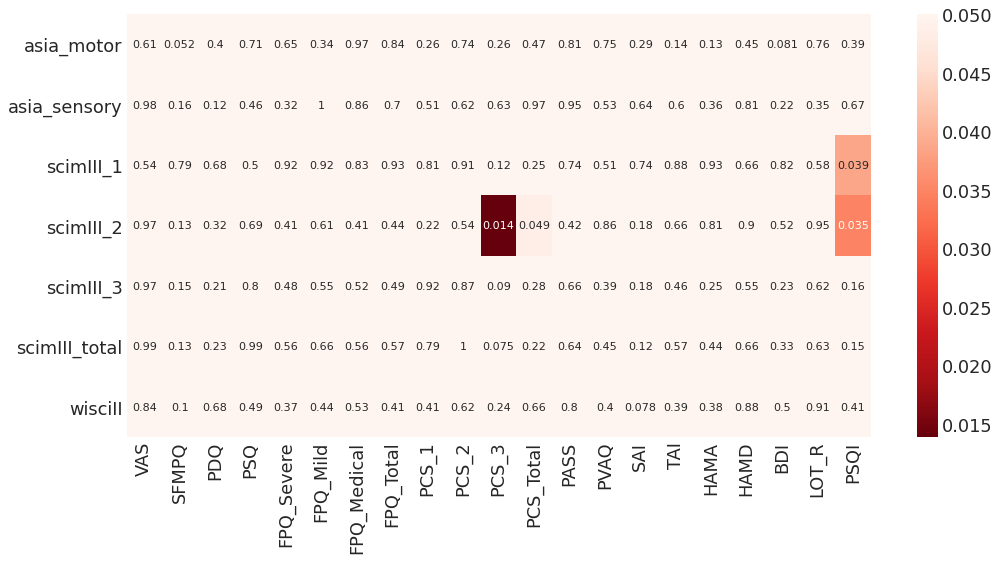

In [65]:
plt.figure(figsize=(15,7), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 

sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

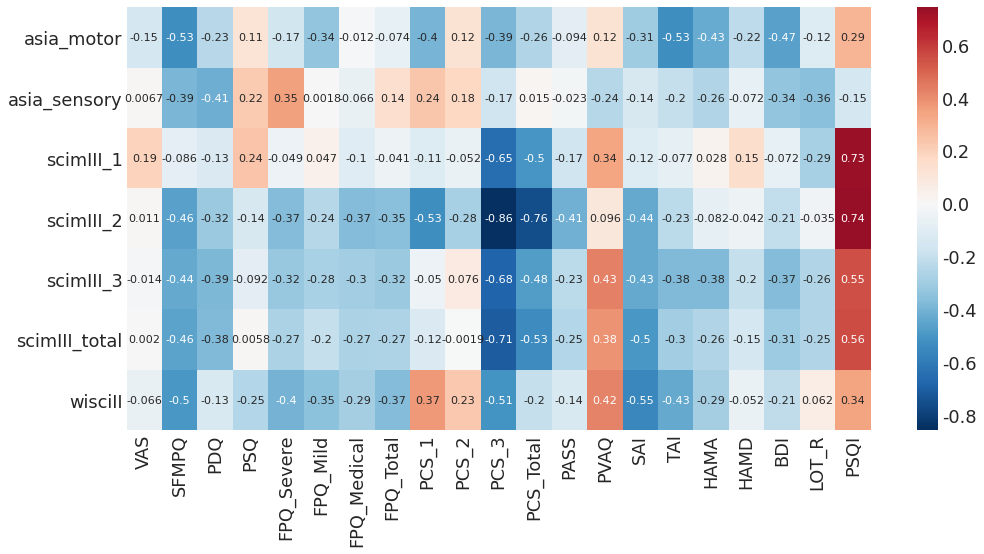

In [66]:
plt.figure(figsize=(15,7), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

<AxesSubplot:xlabel='PCS_3', ylabel='scimIII_2'>

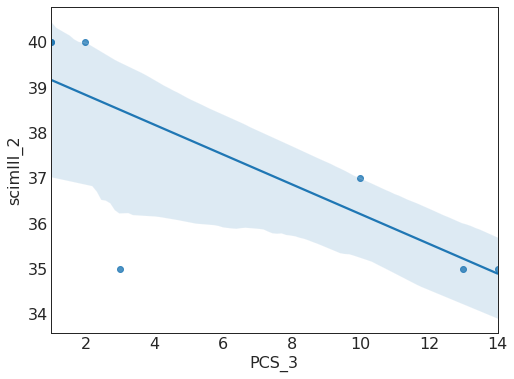

In [74]:
plt.figure(figsize=(8,6))
sns.regplot(x='PCS_3', y='scimIII_2', data=DF_pt)

### 时点1与 vbm

In [75]:
%store -r patient_vbm patient_vbm_2

In [76]:
DF_pt = patient_vbm.join(asia1,lsuffix='1')
rois = patient_vbm.columns
DF_pt

,BA9,BA44,M1,MTG,temporal_pole,r_thal,name,timepoint,time,asia_motor,asia_sensory,scimIII_1,scimIII_2,scimIII_3,scimIII_total,wisciII
ID,,,,,,,,,,,,,,,,
P_013,0.2959,0.3109,0.3921,0.5179,0.4855,0.2494,滕军,1.0000,2/19/2019,84.0000,112.0000,7.0000,39.0000,15.0000,61.0000,20.0000
P_014,0.3445,0.2375,0.3211,0.3846,0.4601,0.2915,陈燕华,1.0000,3/3/2019,95.0000,213.0000,16.0000,40.0000,32.0000,88.0000,20.0000
P_015,0.2877,0.2541,0.3859,0.3627,0.4489,0.2738,郁德华,1.0000,3/1/2019,92.0000,220.0000,14.0000,40.0000,39.0000,93.0000,20.0000
P_016,0.3687,0.3338,0.4232,0.5243,0.4420,0.2654,金美蓉,1.0000,3/6/2019,96.0000,215.0000,20.0000,40.0000,40.0000,100.0000,20.0000
P_018,0.3374,0.2128,0.3605,0.3274,0.4490,0.2833,张金华,1.0000,4/2/2019,88.0000,197.0000,6.0000,40.0000,19.0000,65.0000,6.0000
P_019,0.2919,0.3233,0.3695,0.4317,0.4667,0.2612,汤峻,1.0000,4/17/2019,92.0000,204.0000,4.0000,37.0000,24.0000,65.0000,20.0000
P_021,0.3276,0.3138,0.3786,0.4206,0.3855,0.3035,乔菊芳,1.0000,5/21/2019,50.0000,212.0000,0.0000,35.0000,0.0000,35.0000,0.0000
P_022,0.3565,0.3360,0.4501,0.4552,0.5469,0.2474,曾桂娇,1.0000,6/14/2019,74.0000,186.0000,0.0000,35.0000,0.0000,35.0000,0.0000
P_023,0.2800,0.2232,0.3323,0.3884,0.4699,0.3054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
rows = len(clinicals)
cols = len(rois)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=rois)
pt_coefficient_matrix = pt_p_matrix.copy()
pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value


for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        
        # drop any row with missing value
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))

<AxesSubplot:>

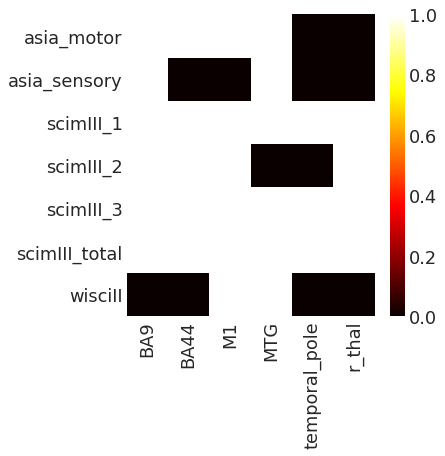

In [78]:
# Figure settings
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(5,5), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(pt_norm_matrix, cmap='hot')

<AxesSubplot:>

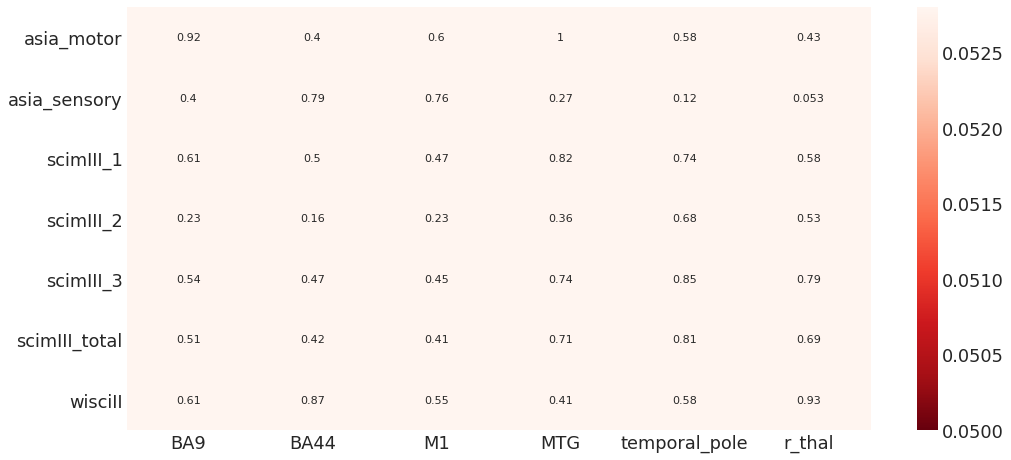

In [79]:
plt.figure(figsize=(15,7), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 

sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

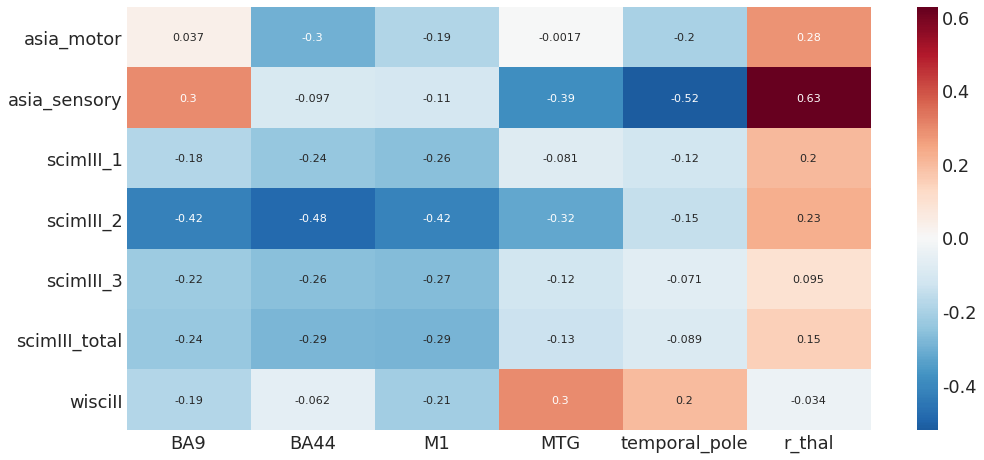

In [80]:
plt.figure(figsize=(15,7), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

<AxesSubplot:xlabel='asia_sensory', ylabel='r_thal'>

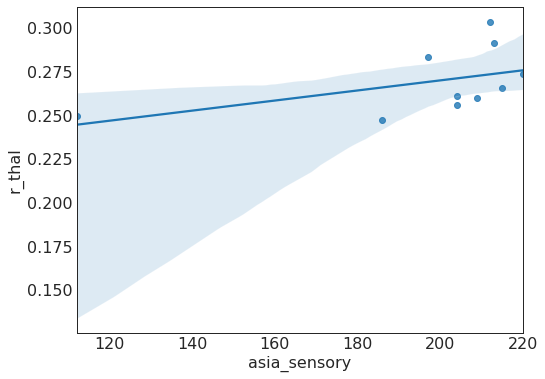

In [81]:
plt.figure(figsize=(8,6))
sns.regplot(x='asia_sensory', y='r_thal', data=DF_pt)

### 时点1 与 DTI

In [82]:
%store -r patient_tbss patient_tbss_2

In [83]:
DF_pt = patient_tbss.join(asia1,lsuffix='1')
rois = patient_tbss.columns
DF_pt

,corticospinal_l,external_capsule_l,retrolenticular_internal_capsule_l,retrolenticular_internal_capsule_r,sma_r,slf_l,slf_r,slf_temporal_l,slf_temporal_r,corticospinal_r,callosalbody,forcepts_minor,name,timepoint,time,asia_motor,asia_sensory,scimIII_1,scimIII_2,scimIII_3,scimIII_total,wisciII
P_014,0.1122,0.1347,0.1917,0.1724,0.1231,0.0573,0.1085,0.0777,0.0825,0.1089,0.0865,0.0594,陈燕华,1.0000,3/3/2019,95.0000,213.0000,16.0000,40.0000,32.0000,88.0000,20.0000
P_015,0.1128,0.1237,0.1905,0.1833,0.1356,0.0608,0.1263,0.0825,0.0932,0.1151,0.0907,0.0640,郁德华,1.0000,3/1/2019,92.0000,220.0000,14.0000,40.0000,39.0000,93.0000,20.0000
P_016,0.1219,0.1418,0.2082,0.1989,0.1375,0.0660,0.1351,0.0898,0.0975,0.1245,0.0973,0.0682,金美蓉,1.0000,3/6/2019,96.0000,215.0000,20.0000,40.0000,40.0000,100.0000,20.0000
P_018,0.1178,0.1320,0.2007,0.2043,0.1267,0.0624,0.1331,0.0857,0.0963,0.1178,0.0911,0.0614,张金华,1.0000,4/2/2019,88.0000,197.0000,6.0000,40.0000,19.0000,65.0000,6.0000
P_019,0.1177,0.1421,0.1972,0.1871,0.1404,0.0638,0.1331,0.0859,0.0952,0.1208,0.0971,0.0691,汤峻,1.0000,4/17/2019,92.0000,204.0000,4.0000,37.0000,24.0000,65.0000,20.0000
P_021,0.1208,0.1286,0.2053,0.2036,0.1391,0.0659,0.1341,0.0892,0.0970,0.1220,0.0932,0.0636,乔菊芳,1.0000,5/21/2019,50.0000,212.0000,0.0000,35.0000,0.0000,35.0000,0.0000
P_022,0.1237,0.1427,0.2157,0.2068,0.1407,0.0687,0.1393,0.0935,0.1024,0.1243,0.1018,0.0727,曾桂娇,1.0000,6/14/2019,74.0000,186.0000,0.0000,35.0000,0.0000,35.0000,0.0000
P_023,0.1184,0.1316,0.2172,0.1936,0.1275,0.0637,0.1268,0.0852,0.0942,0.1203,0.0956,0.0650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_024,0.1289,0.1490,0.2261,0.2250,0.1417,0.0695,0.1433,0.0950,0.1035,0.1291,0.1030,0.0701,蔡金红,1.0000,6/27/2019,86.0000,209.0000,0.0000,35.0000,17.0000,52.0000,20.0000
P_030,0.1239,0.1391,0.2185,0.2114,0.1441,0.0689,0.1425,0.0945,0.1007,0.1252,0.1024,0.0718,归夏平,1.0000,11/9/2019,88.0000,204.0000,1.0000,35.0000,11.0000,47.0000,17.0000


In [84]:
rows = len(clinicals)
cols = len(rois)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=rois)
pt_coefficient_matrix = pt_p_matrix.copy()
pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value



for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        
        # drop any row with missing value
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))

Linear regression plot if the p value of pearson_r is significant:


<AxesSubplot:>

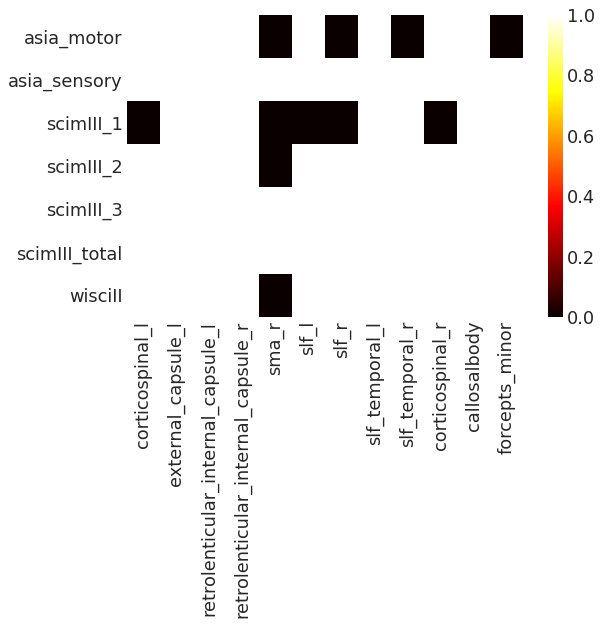

In [85]:
# Figure settings
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(8,5), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(pt_norm_matrix, cmap='hot')

<AxesSubplot:>

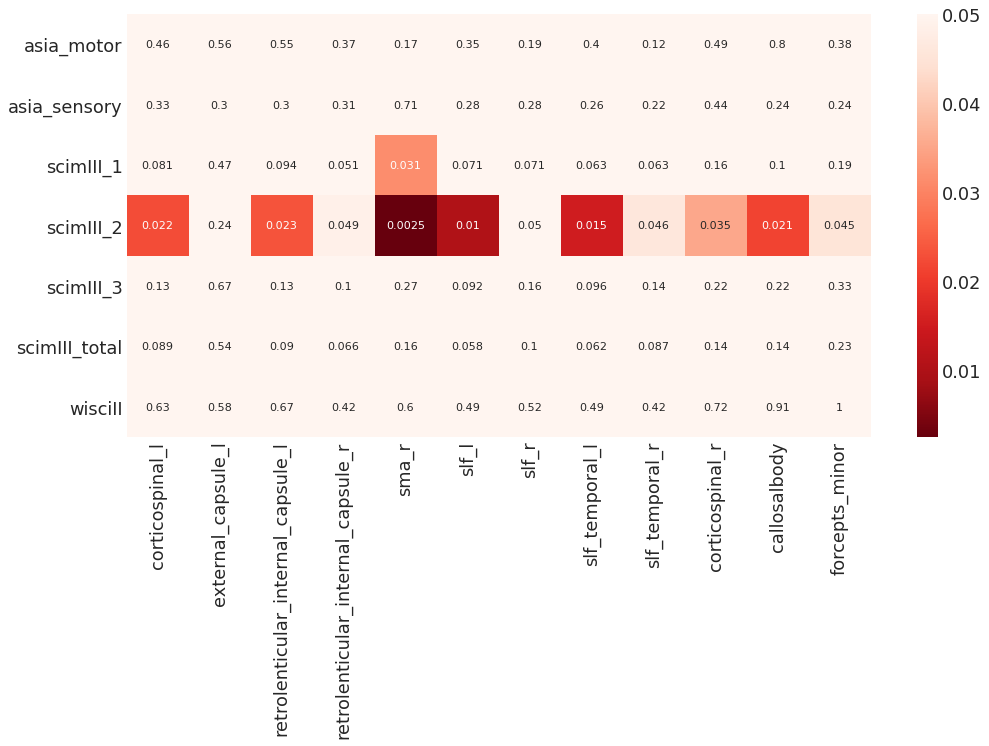

In [87]:
plt.figure(figsize=(15,7), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 

sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

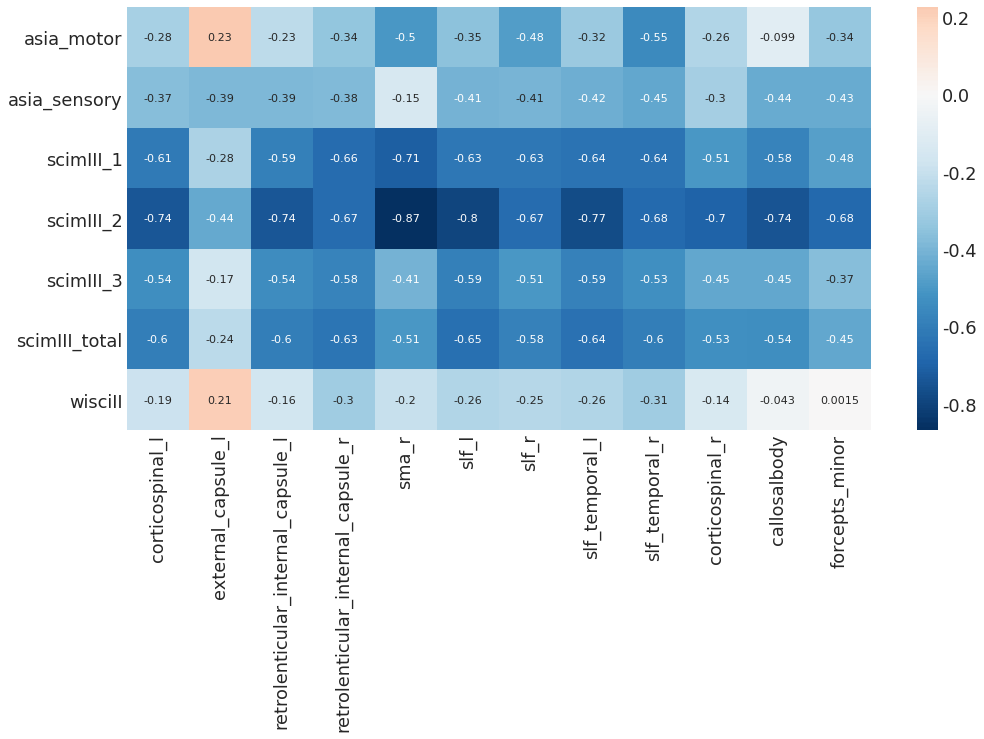

In [88]:
plt.figure(figsize=(15,7), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

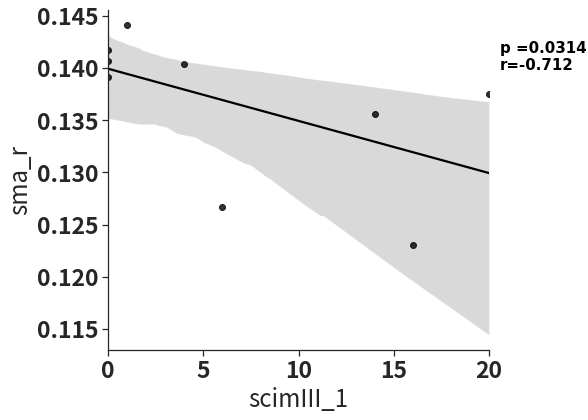

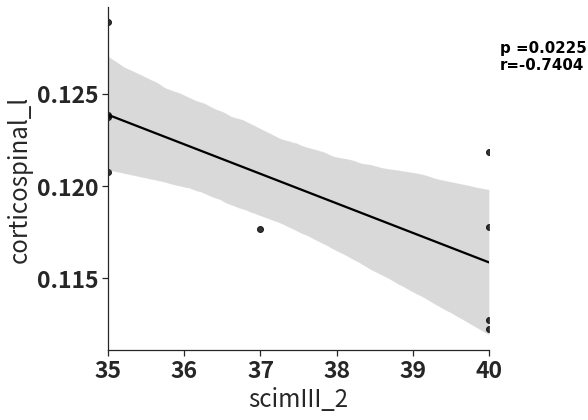

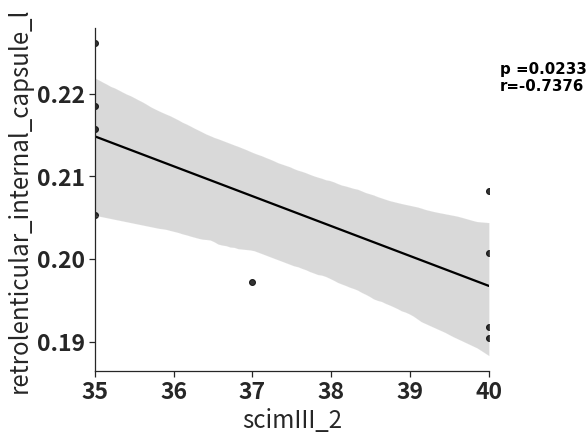

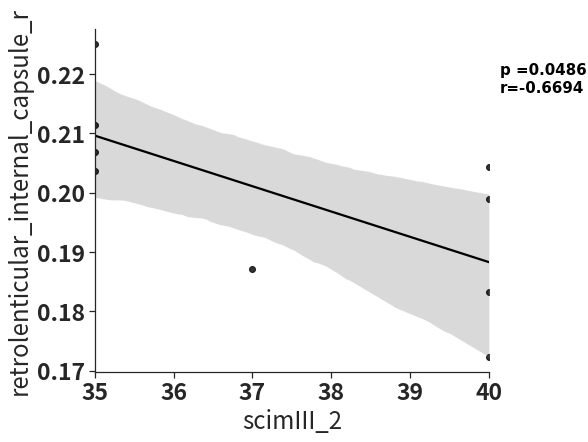

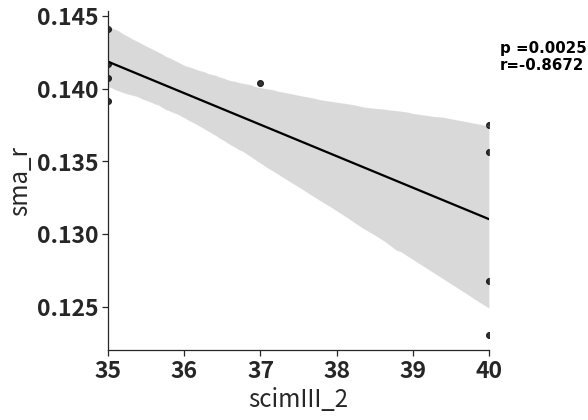

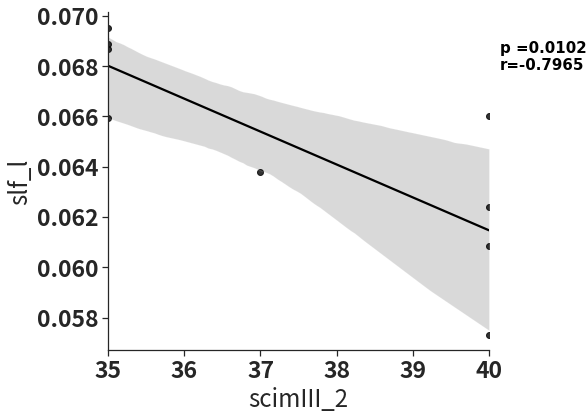

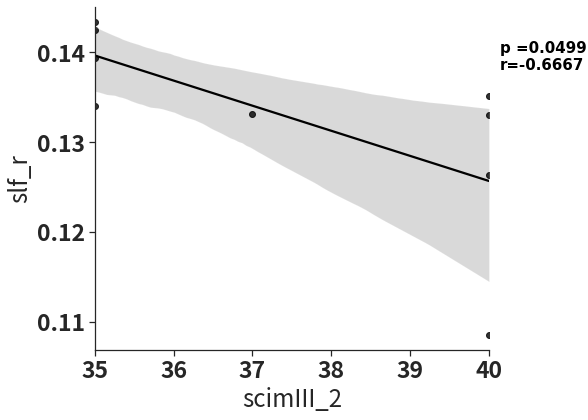

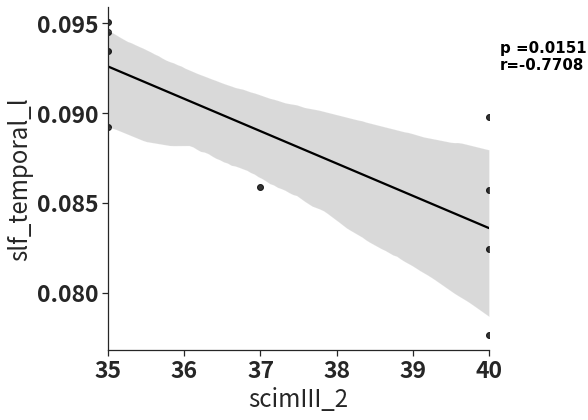

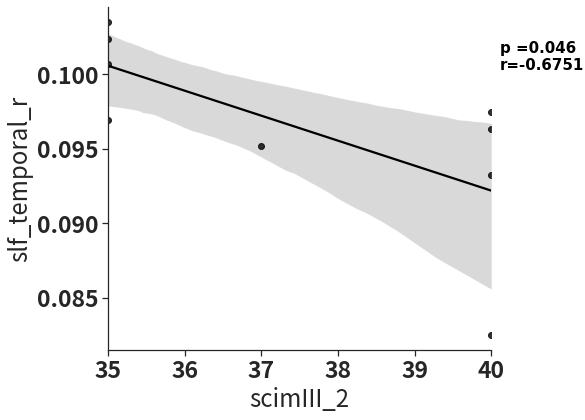

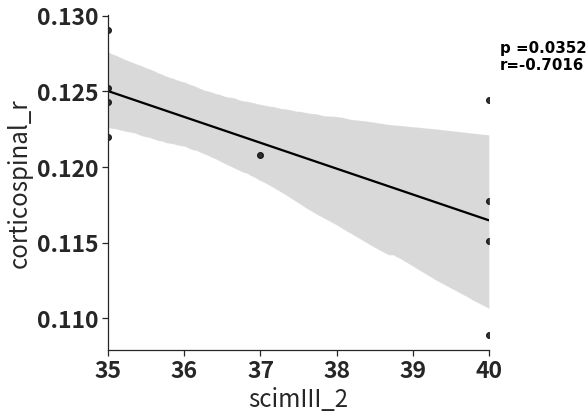

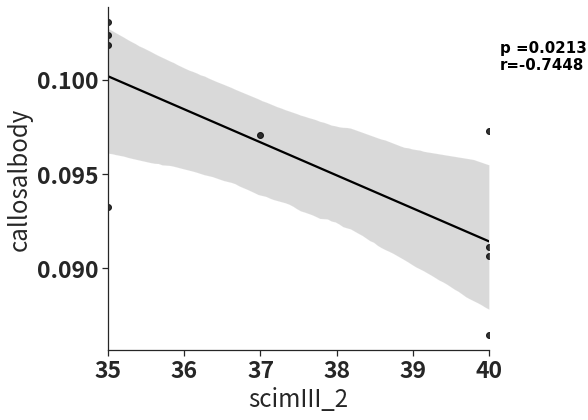

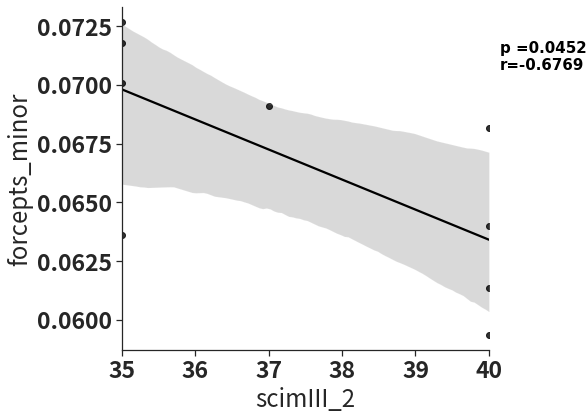

In [91]:
for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0)
        p_value=pt_p_matrix.loc[x_label, y_label]
        if  p_value < 0.05:
            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=2)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            if pt_coefficient_matrix.loc[x_label,y_label] <= 0:
                plt.annotate("p ={}\nr={}".format(round(p_value, 4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(500, 350), xycoords='figure points',fontsize=15,color="black")
            else:
                plt.annotate("p={}\nr ={}".format(round(p_value, 4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(100, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tick_params(labelsize=23)
            plt.tight_layout()
            plt.show()

### 时点2与行为评分

In [93]:
print("纳入行为数据分析的患者：{}".format(len(Pt_included.index)))
Pt_included.index

纳入行为数据分析的患者：20


Index(['P_003', 'P_004', 'P_013', 'P_014', 'P_018', 'P_021', 'P_007', 'P_009',
       'P_011', 'P_019', 'P_020', 'P_022', 'P_016', 'P_006', 'P_010', 'P_015',
       'P_023', 'P_024', 'P_027', 'P_028'],
      dtype='object', name='PatientID')

In [94]:
DF_pt = Scale_pt_2.join(asia2,lsuffix='1')

In [95]:
scales = Scale_pt.columns[1:]
rows = len(clinicals)
cols = len(scales)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=scales)
pt_coefficient_matrix = pt_p_matrix.copy()

pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value


for i in range(len(clinicals)):
    for j in range(len(scales)):
        x_label = clinicals[i]
        y_label = scales[j]
        # drop any row with missing value
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))


<AxesSubplot:>

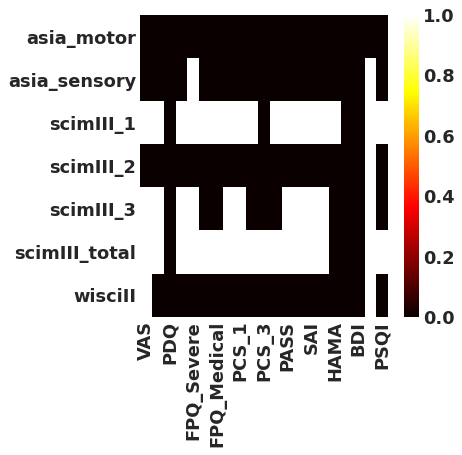

In [96]:
# Figure settings
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(5,5), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(pt_norm_matrix, cmap='hot')

<AxesSubplot:>

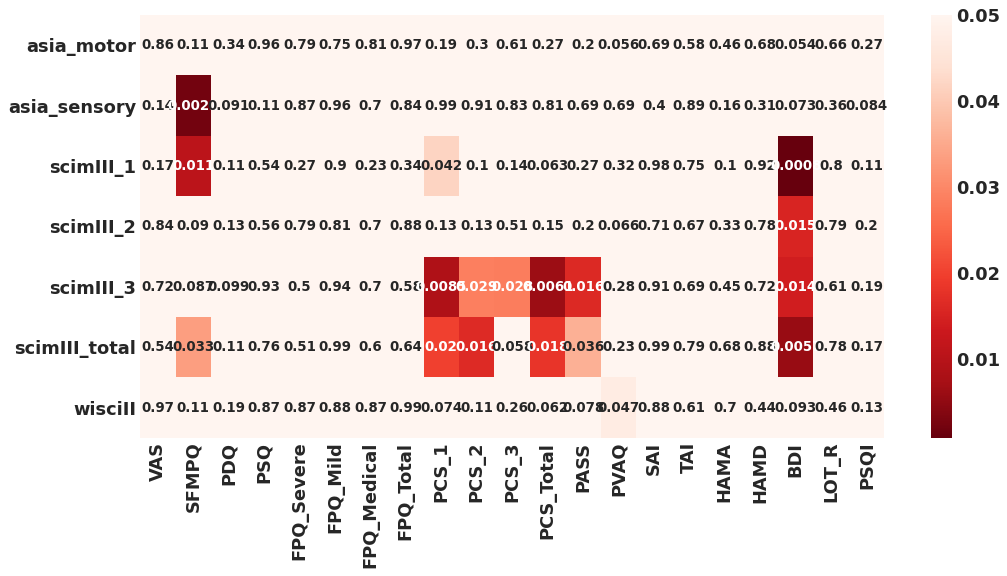

In [97]:
plt.figure(figsize=(15,7), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 

sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

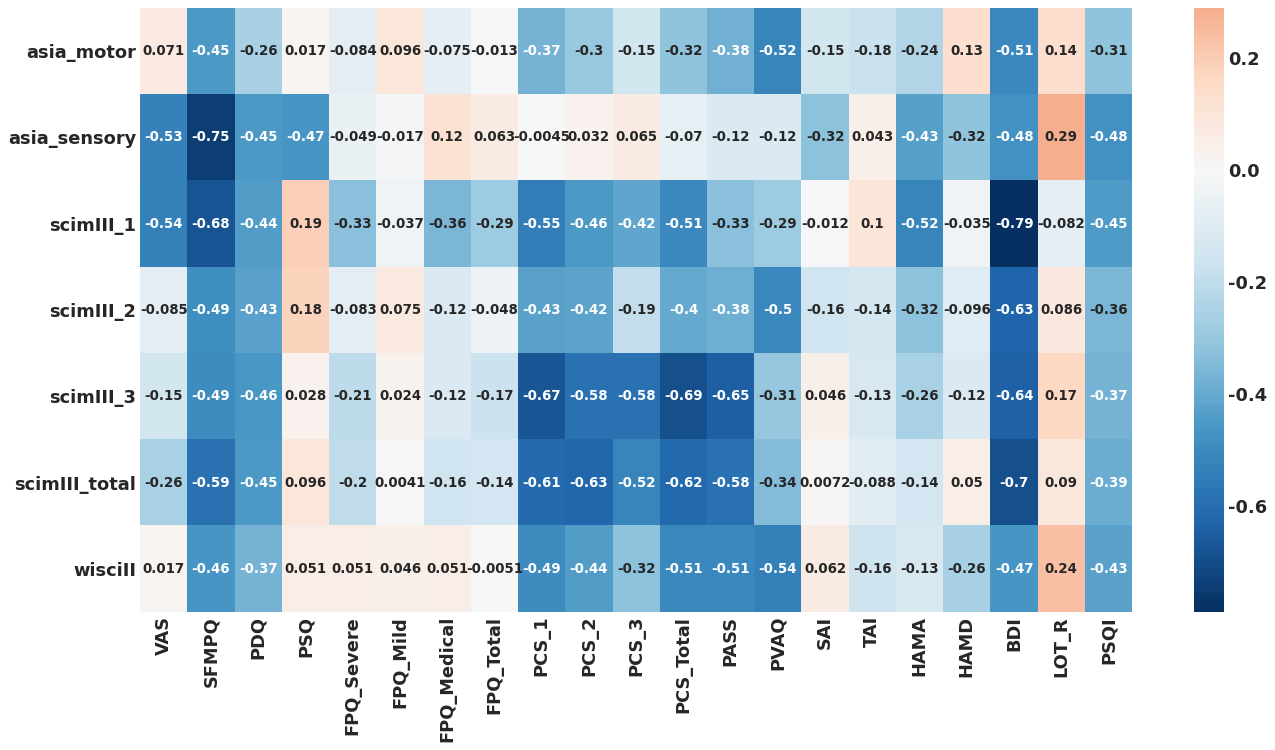

In [98]:
plt.figure(figsize=(20,10), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

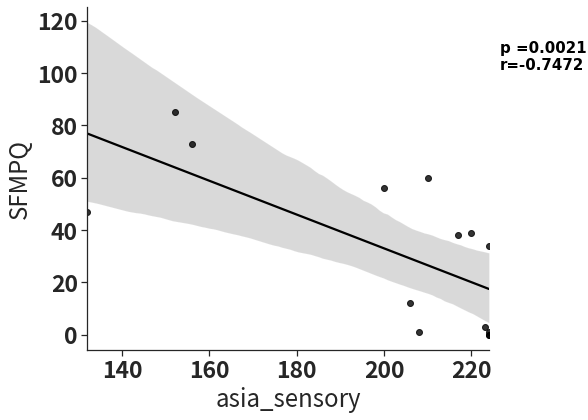

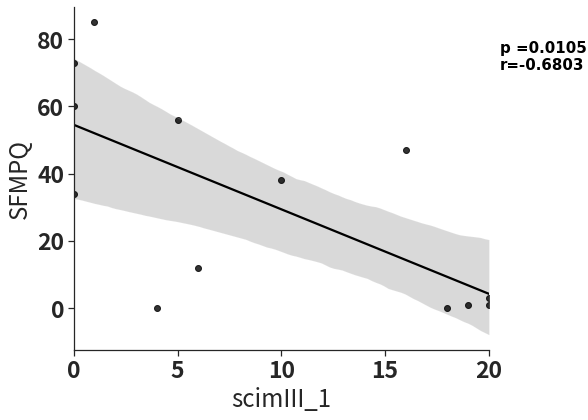

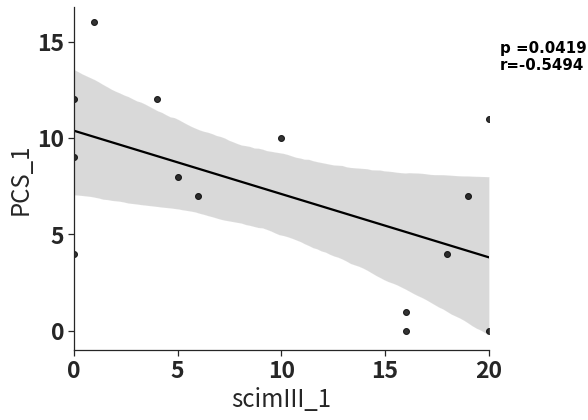

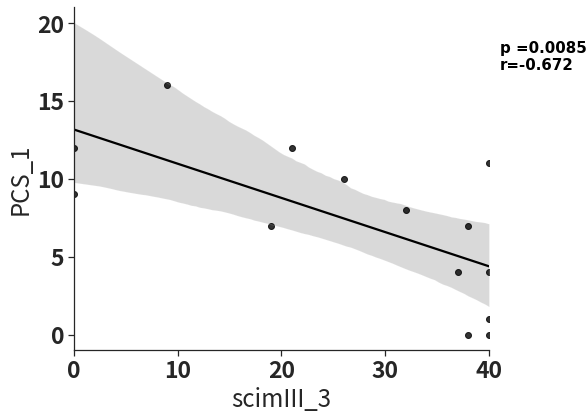

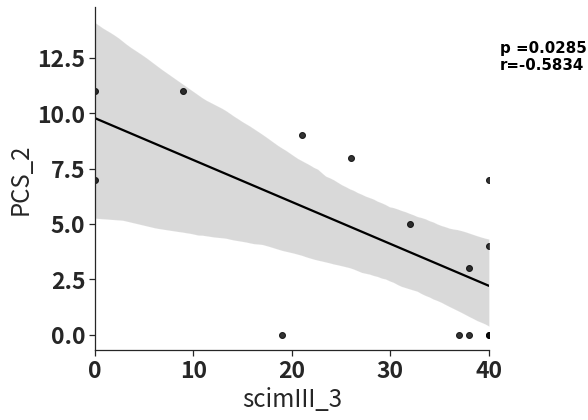

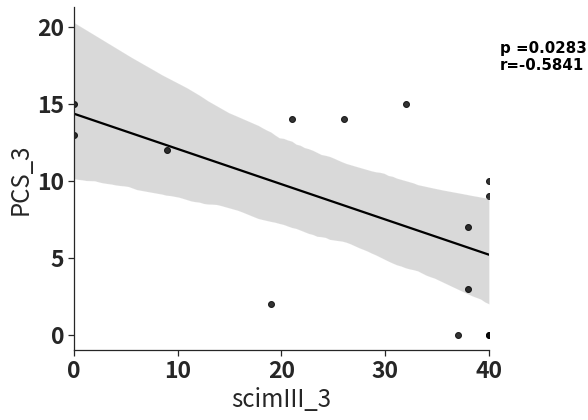

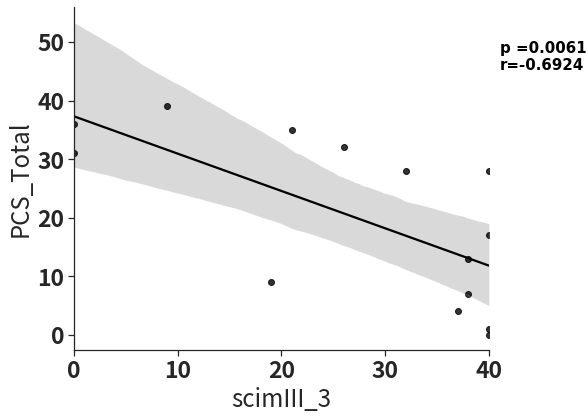

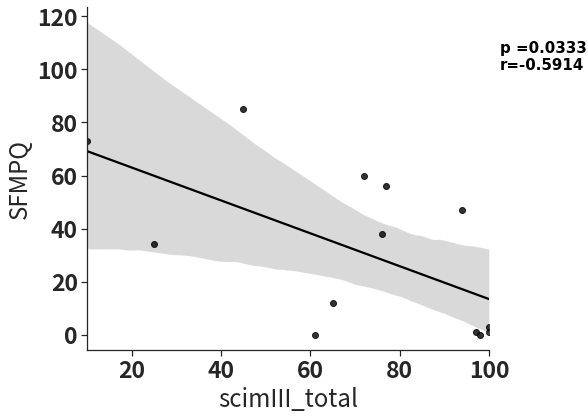

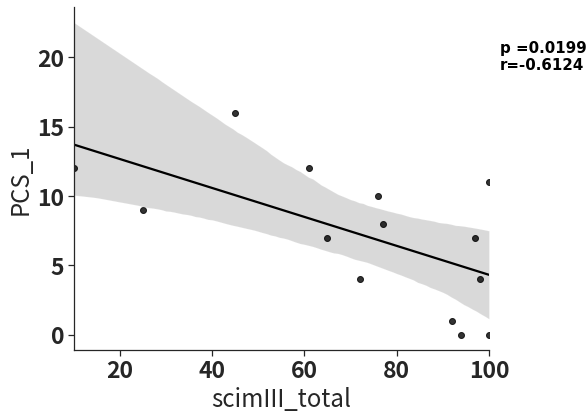

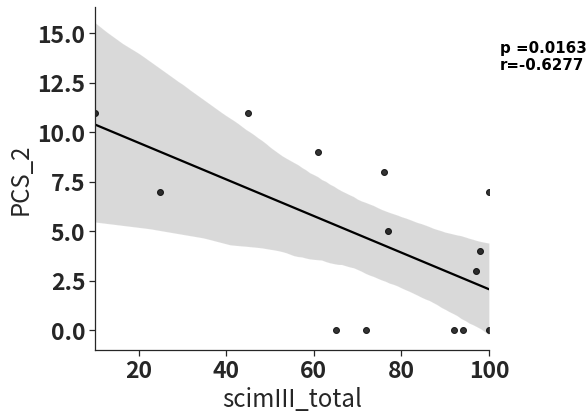

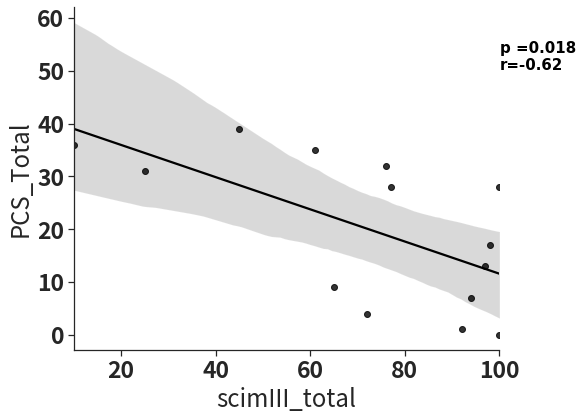

In [101]:
for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = scales[j]
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit
        p_value = pt_p_matrix.loc[x_label, y_label]
        if p_value < 0.05:
            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=2)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            if pt_coefficient_matrix.loc[x_label,y_label] <= 0:
                plt.annotate("p ={}\nr={}".format(round(p_value, 4), pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(500, 350), xycoords='figure points',fontsize=15,color="black")
            else:
                plt.annotate("p={}\nr ={}".format(round(p_value, 4), pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(100, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tick_params(labelsize=23)
            plt.tight_layout()
            plt.show()

### 时点2与 vbm

In [102]:
%store -r patient_vbm patient_vbm_2

In [103]:
DF_pt = patient_vbm_2.join(asia2,lsuffix='1')
rois = patient_vbm_2.columns
DF_pt

,BA9,BA44,M1,MTG,temporal_pole,r_thal,name,timepoint,time,asia_motor,asia_sensory,scimIII_1,scimIII_2,scimIII_3,scimIII_total,wisciII
ID,,,,,,,,,,,,,,,,
P_001,0.3364,0.2748,0.4779,0.4607,0.4621,0.2822,杨友德,2,12/11/2018,54.0000,159.0000,NaN,NaN,NaN,NaN,NaN
P_003,0.3783,0.3529,0.4419,0.4736,0.4362,0.1962,闻雪荣,2,1/16/2019,95.0000,220.0000,NaN,NaN,NaN,NaN,NaN
P_013,0.4100,0.3752,0.4841,0.5415,0.4377,0.1863,滕军,2,2/27/2019,96.0000,132.0000,16.0000,40.0000,38.0000,94.0000,20.0000
P_014,0.4009,0.2186,0.3629,0.4222,0.4538,0.2580,陈燕华,2,3/6/2019,92.0000,208.0000,19.0000,40.0000,38.0000,97.0000,20.0000
P_018,0.3968,0.2561,0.4467,0.3378,0.4051,0.2674,张金华,2,4/16/2019,91.0000,206.0000,6.0000,40.0000,19.0000,65.0000,13.0000
P_019,0.3295,0.3622,0.4389,0.4809,0.4636,0.2651,汤峻,2,4/23/2019,98.0000,224.0000,18.0000,40.0000,40.0000,98.0000,20.0000
P_020,0.4007,0.3112,0.4440,0.4860,0.4150,0.2893,刘宏,2,5/14/2019,92.0000,217.0000,10.0000,40.0000,26.0000,76.0000,20.0000
P_021,0.3564,0.3605,0.3826,0.4725,0.3701,0.3174,乔菊芳,2,5/29/2019,78.0000,221.0000,0.0000,33.0000,2.0000,35.0000,0.0000
P_022,0.3762,0.3758,0.4912,0.4898,0.5489,0.2325,曾桂娇,2,6/25/2019,92.0000,200.0000,5.0000,40.0000,32.0000,77.0000,20.0000


In [104]:
rows = len(clinicals)
cols = len(rois)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=rois)
pt_coefficient_matrix = pt_p_matrix.copy()
pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value



for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        # drop any row with missing value
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))



Linear regression plot if the p value of pearson_r is significant:


<AxesSubplot:>

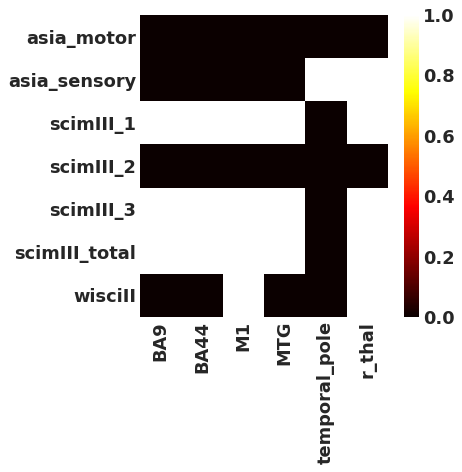

In [45]:
# Figure settings
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(5,5), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(pt_norm_matrix, cmap='hot')

<AxesSubplot:>

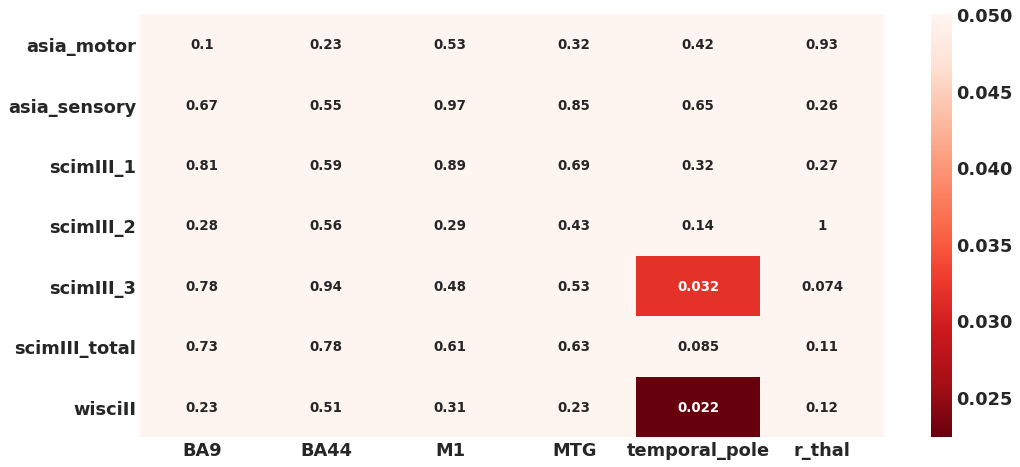

In [46]:
plt.figure(figsize=(15,7), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 

sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

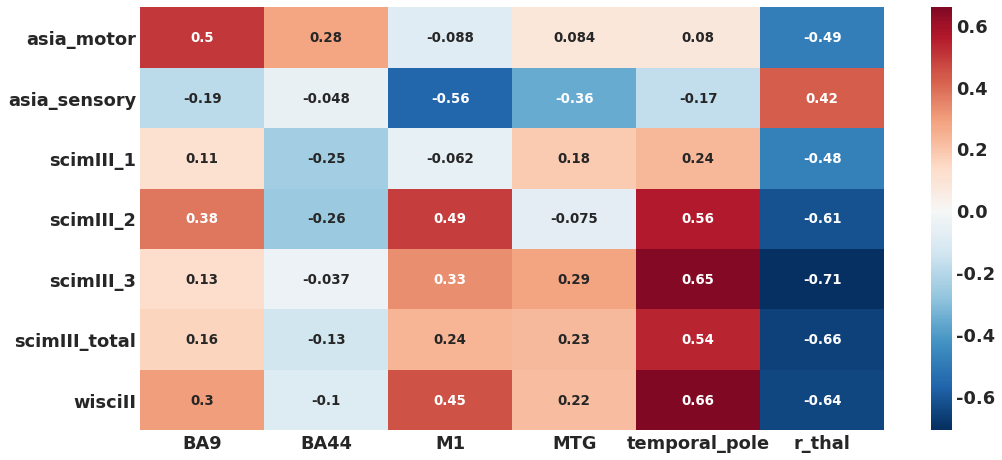

In [47]:
plt.figure(figsize=(15,7), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

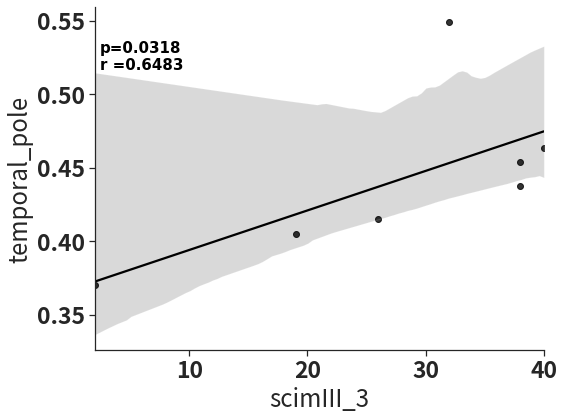

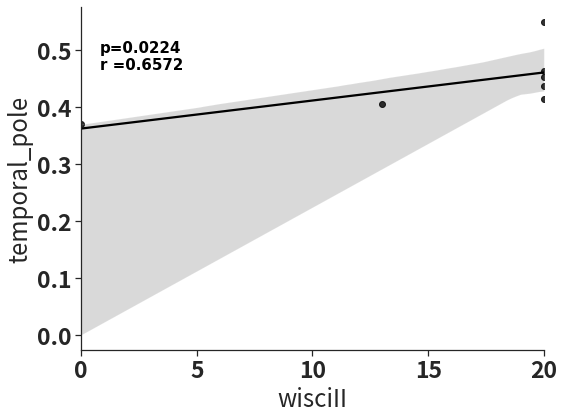

In [48]:
for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit
        p_value = pt_p_matrix_perm.loc[x_label, y_label]
        if p_value <0.05:
            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=2)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            if pt_coefficient_matrix.loc[x_label,y_label] <= 0:
                plt.annotate("p ={}\nr={}".format(round(p_value,4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(500, 350), xycoords='figure points',fontsize=15,color="black")
            else:
                plt.annotate("p={}\nr ={}".format(round(p_value,4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(100, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tick_params(labelsize=23)
            plt.tight_layout()
            plt.show()

### 时点2 与 DTI

In [106]:
%store -r patient_tbss patient_tbss_2

In [107]:
DF_pt = patient_tbss_2.join(asia2,lsuffix='1')
rois = patient_tbss_2.columns
DF_pt

,corticospinal_l,external_capsule_l,retrolenticular_internal_capsule_l,retrolenticular_internal_capsule_r,sma_r,slf_l,slf_r,slf_temporal_l,slf_temporal_r,corticospinal_r,callosalbody,forcepts_minor,name,timepoint,time,asia_motor,asia_sensory,scimIII_1,scimIII_2,scimIII_3,scimIII_total,wisciII
P_001,0.1269,0.1432,0.2282,0.2000,0.1309,0.0665,0.1353,0.0940,0.1022,0.1192,0.0981,0.0684,杨友德,2,12/11/2018,54.0000,159.0000,NaN,NaN,NaN,NaN,NaN
P_003,0.1284,0.1430,0.2292,0.2279,0.1330,0.0647,0.1312,0.0908,0.0997,0.1251,0.1004,0.0695,闻雪荣,2,1/16/2019,95.0000,220.0000,NaN,NaN,NaN,NaN,NaN
P_013,0.1252,0.1489,0.2116,0.2138,0.1305,0.0673,0.1374,0.0943,0.1035,0.1202,0.1046,0.0712,滕军,2,2/27/2019,96.0000,132.0000,16.0000,40.0000,38.0000,94.0000,20.0000
P_014,0.1130,0.1358,0.1883,0.1757,0.1156,0.0559,0.1082,0.0783,0.0849,0.1068,0.0873,0.0585,陈燕华,2,3/6/2019,92.0000,208.0000,19.0000,40.0000,38.0000,97.0000,20.0000
P_018,0.1192,0.1291,0.2049,0.2079,0.1202,0.0627,0.1337,0.0892,0.0980,0.1155,0.0937,0.0628,张金华,2,4/16/2019,91.0000,206.0000,6.0000,40.0000,19.0000,65.0000,13.0000
P_019,0.1222,0.1441,0.2088,0.1926,0.1330,0.0645,0.1336,0.0892,0.0990,0.1162,0.0997,0.0695,汤峻,2,4/23/2019,98.0000,224.0000,18.0000,40.0000,40.0000,98.0000,20.0000
P_020,0.1220,0.1396,0.2110,0.1939,0.1351,0.0633,0.1310,0.0902,0.0974,0.1156,0.0988,0.0682,刘宏,2,5/14/2019,92.0000,217.0000,10.0000,40.0000,26.0000,76.0000,20.0000
P_021,0.1210,0.1271,0.2093,0.2037,0.1268,0.0652,0.1256,0.0911,0.0959,0.1187,0.0936,0.0621,乔菊芳,2,5/29/2019,78.0000,221.0000,0.0000,33.0000,2.0000,35.0000,0.0000
P_022,0.1280,0.1451,0.2222,0.2124,0.1365,0.0699,0.1403,0.0988,0.1059,0.1213,0.1048,0.0721,曾桂娇,2,6/25/2019,92.0000,200.0000,5.0000,40.0000,32.0000,77.0000,20.0000


In [108]:
rows = len(clinicals)
cols = len(rois)


pt_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=clinicals, columns=rois)
pt_coefficient_matrix = pt_p_matrix.copy()
pt_p_matrix_perm = pt_p_matrix.copy()
pt_norm_matrix = pt_coefficient_matrix.copy()


def set_matrix_value(matrix,x_label, y_label, value):
    matrix.loc[x_label,y_label] = value

for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        # drop any row with missing value
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        
        # 多元正态检验, 1 代表通过 用pearson  0 则用spearman
        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        set_matrix_value(pt_norm_matrix, x_label, y_label, norm_bool)
        
        pccs = stats.pearsonr(df[x_label], df[y_label]) if norm_bool else stats.spearmanr(df[x_label], df[y_label])
        set_matrix_value(pt_coefficient_matrix, x_label, y_label, round(pccs[0],4))
        set_matrix_value(pt_p_matrix, x_label, y_label, round(pccs[1],4))


<AxesSubplot:>

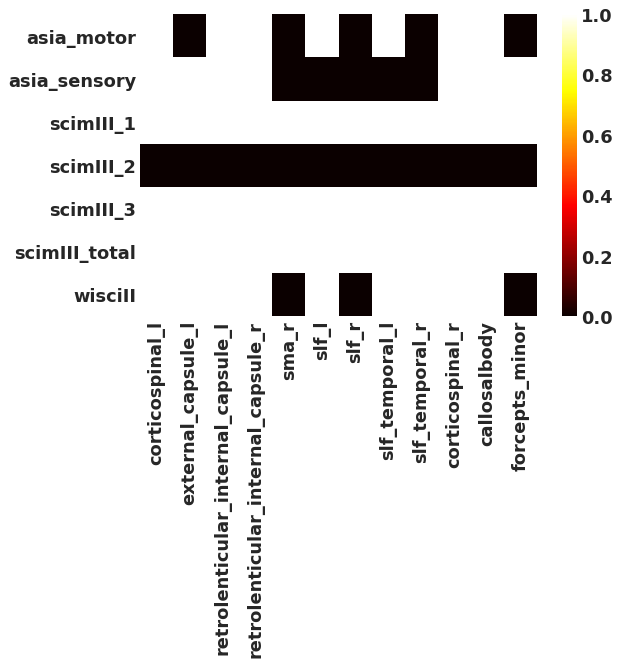

In [109]:
# Figure settings
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(8,5), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(pt_norm_matrix, cmap='hot')

<AxesSubplot:>

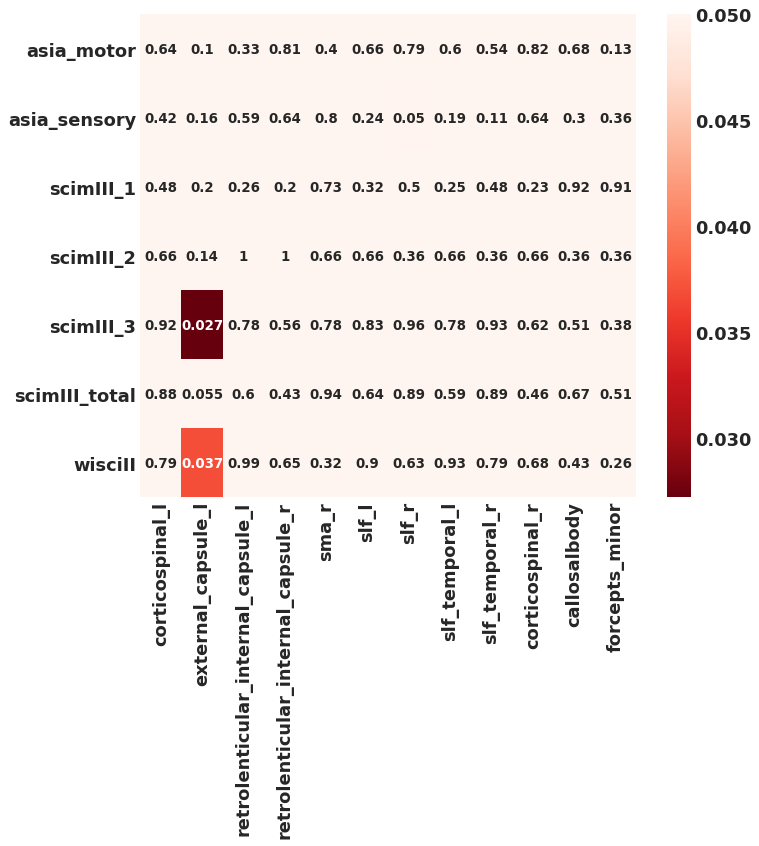

In [119]:
plt.figure(figsize=(10,8), dpi= 80)
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(pt_p_matrix, cmap='Reds_r',vmax=0.05, annot=True)

<AxesSubplot:>

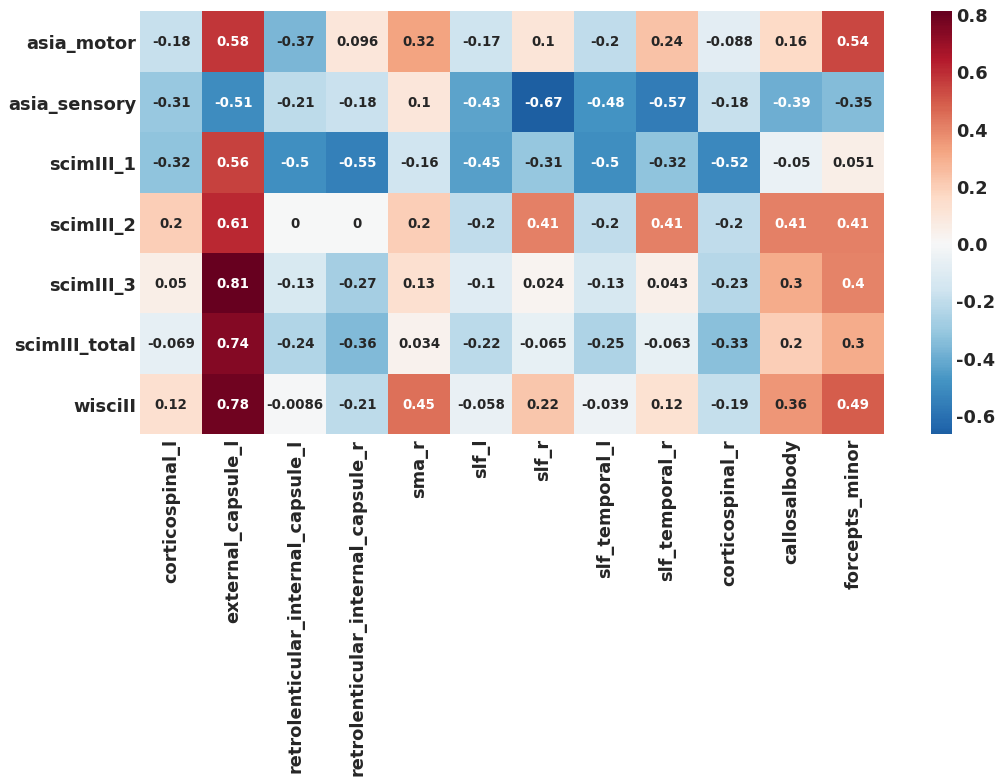

In [111]:
plt.figure(figsize=(15,7), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(pt_coefficient_matrix, cmap='RdBu_r', center=0, annot=True)

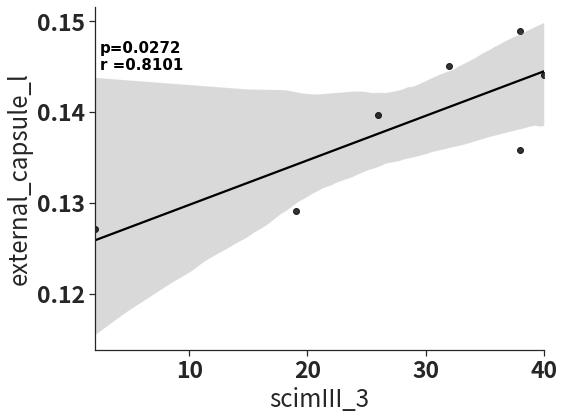

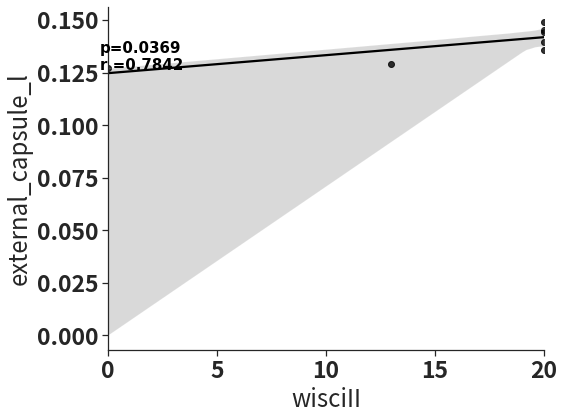

In [55]:
for i in range(len(clinicals)):
    for j in range(len(rois)):
        x_label = clinicals[i]
        y_label = rois[j]
        df = DF_pt[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) 
        p_value = pt_p_matrix_perm.loc[x_label, y_label]
        if p_value <0.05:
            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=2)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            if pt_coefficient_matrix.loc[x_label,y_label] <= 0:
                plt.annotate("p ={}\nr={}".format(round(p_value,4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(500, 350), xycoords='figure points',fontsize=15,color="black")
            else:
                plt.annotate("p={}\nr ={}".format(round(p_value,4),pt_coefficient_matrix.loc[x_label, y_label])
                         , xy=(100, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tick_params(labelsize=23)
            plt.tight_layout()
            plt.show()

# 总结
拟合效果欠佳，难以拿出说服性的证据